1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

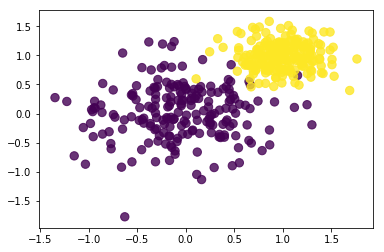

In [2]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

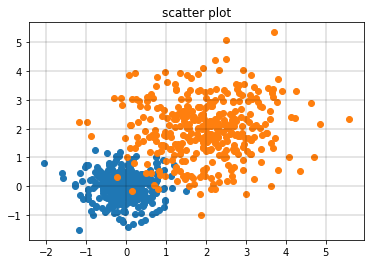

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

N=350
nrnd_x1 = np.random.normal(loc=0., scale=0.5, size=(N,))
nrnd_y1 = np.random.normal(loc=0., scale=0.5, size=(N,))

nrnd_x2 = np.random.normal(loc=2, scale=1., size=(N,))
nrnd_y2 = np.random.normal(loc=2, scale=1., size=(N,))

plt.scatter(nrnd_x1, nrnd_y1) # create and plot the histogram
plt.scatter(nrnd_x2, nrnd_y2)
plt.title("scatter plot")
plt.grid(color='k', linestyle='-', linewidth=0.2)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

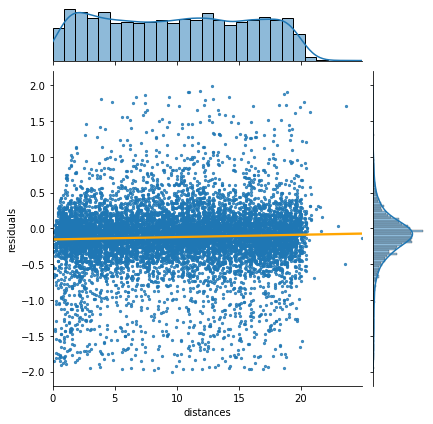

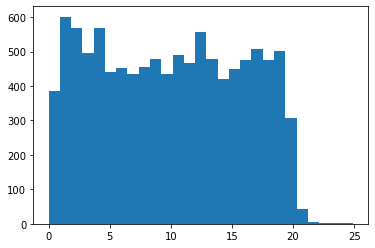

In [168]:
import pickle
import seaborn as sns

diz=dict(pd.read_pickle('residuals_261.pkl').item())
data=pd.DataFrame(diz)
data = data.loc[(data["residuals"] > -2) & (data["residuals"] < 2)]
sns.jointplot(x="distances", y="residuals", data=data, kind = "reg", scatter_kws={"s": 5}, line_kws={"color": "orange"})
plt.show()

y, bin_e,_ = plt.hist(data['distances'],27)
plt.show()
x=np.zeros(27)
y=np.zeros(27)
y_err=np.zeros(27)
for i in range(len(bin_e)-1):
    x[i] = 0.5*(bin_e[i] + bin_e[i+1])

for i in range(len(x)-1):
    y[i] = data['residuals'][(data['distances']>x[i]) & (data['distances']<=x[i+1]) ].mean()
    y_err[i] = data['residuals'][(data['distances']>x[i]) & (data['distances']<=x[i+1]) ].std()

    
    
#distances are almost uniformly distributed (not in the end part of the data), the residuals are distributed as a guassian as exprectd, so the fit meakes sense

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


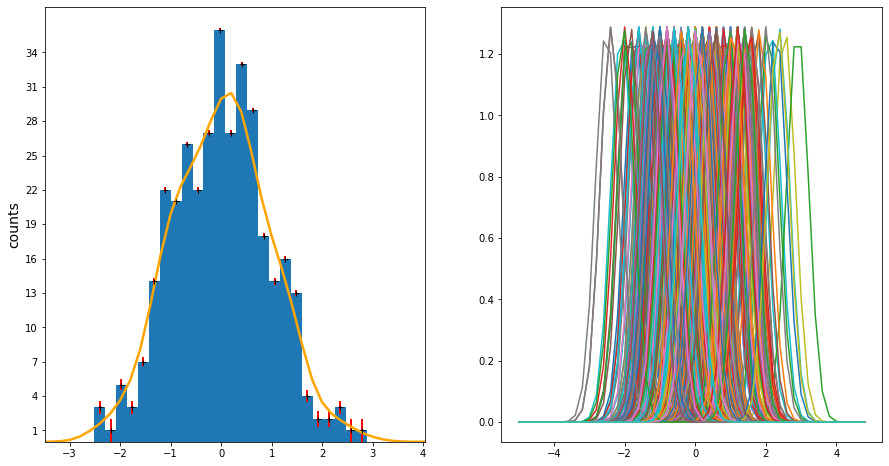

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import norm
N=350
M=25
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

x= np.random.normal(loc=0., scale=1, size=(N,))
y, bin_edges,_ = ax1.hist(x,M)

bin_centers=np.zeros(M)

for i in range(len(bin_edges)-1):
    bin_centers[i] = 0.5*(bin_edges[i] + bin_edges[i+1])

y_t=np.arange(min(y), max(y), 3)
err_y=[]


for i in range(len(y)):
    if y[i]!=0:
        err_y.append(1/np.sqrt(y[i])) 
    else:
        err_y.append(0)
        
ax1.errorbar(bin_centers, y, yerr=err_y, fmt="+k", ecolor='red', elinewidth=2, markersize=5)
ax1.set_ylabel('counts', size=14)
ax1.set_yticks(y_t)

ax1.set_xlim(min(bin_centers)*1.45 ,max(bin_centers)*1.45)

x_axis = np.arange(-5, 5, 0.2)
sigma=np.std(x)
def gaussians(mu=x,sigma=1.06*sigma*x.size**(-1/5)): 
    return np.array([(norm.pdf(x_axis, loc=i, scale=sigma)) for i in mu])
for g in gaussians(): ax2.plot(x_axis, g)

from scipy.integrate import trapz

integral = trapz(np.sum(gaussians(), axis=0),x_axis)

isto=trapz(y, bin_centers)

fact = (isto/integral)

bin_size_right=(0.2)
bin_size_left=(max(bin_edges)-min(bin_edges))/M


ax1.plot(x_axis, (np.sum(gaussians(), axis=0)*fact), color = "orange", linewidth=2.5)

plt.show()


